In [0]:
# IMPORT GENERIC PACKAGES
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn import metrics

In [0]:
data = pd.read_csv("nyc-rolling-sales.csv")
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors = 'coerce') 
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors = 'coerce') 
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors = 'coerce') 

In [0]:
data['SALE PRICE'] = data['SALE PRICE'].fillna(0)
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].fillna(0)
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(0)
data = data.drop(columns=['Unnamed: 0'])
data = data.drop(columns=['BLOCK'])
data = data.drop(columns=['LOT'])
data = data.drop(columns=['ADDRESS'])
data = data.drop(columns=['APARTMENT NUMBER'])

data.NEIGHBORHOOD = pd.Categorical(data['NEIGHBORHOOD'])
data['NEIGHBORHOOD'] = data.NEIGHBORHOOD.cat.codes

data.rename(columns={'BUILDING CLASS CATEGORY': 'BUILDING_CLASS_CATEGORY', 'TAX CLASS AT PRESENT': 'TAX_CLASS_AT_PRESENT', 'BUILDING CLASS AT PRESENT': 'BUILDING_CLASS_AT_PRESENT', 'TAX CLASS AT TIME OF SALE': 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING CLASS AT TIME OF SALE': 'BUILDING_CLASS_AT_TIME_OF_SALE'}, inplace=True)

data.BUILDING_CLASS_CATEGORY = pd.Categorical(data['BUILDING_CLASS_CATEGORY'])
data['BUILDING_CLASS_CATEGORY'] = data.BUILDING_CLASS_CATEGORY.cat.codes

data.TAX_CLASS_AT_PRESENT = pd.Categorical(data['TAX_CLASS_AT_PRESENT'])
data['TAX_CLASS_AT_PRESENT'] = data.TAX_CLASS_AT_PRESENT.cat.codes

data.BUILDING_CLASS_AT_PRESENT = pd.Categorical(data['BUILDING_CLASS_AT_PRESENT'])
data['BUILDING_CLASS_AT_PRESENT'] = data.BUILDING_CLASS_AT_PRESENT.cat.codes

data.TAX_CLASS_AT_TIME_OF_SALE = pd.Categorical(data['TAX_CLASS_AT_TIME_OF_SALE'])
data['TAX_CLASS_AT_TIME_OF_SALE'] = data.TAX_CLASS_AT_TIME_OF_SALE.cat.codes

data.BUILDING_CLASS_AT_TIME_OF_SALE = pd.Categorical(data['BUILDING_CLASS_AT_TIME_OF_SALE'])
data['BUILDING_CLASS_AT_TIME_OF_SALE'] = data.BUILDING_CLASS_AT_TIME_OF_SALE.cat.codes

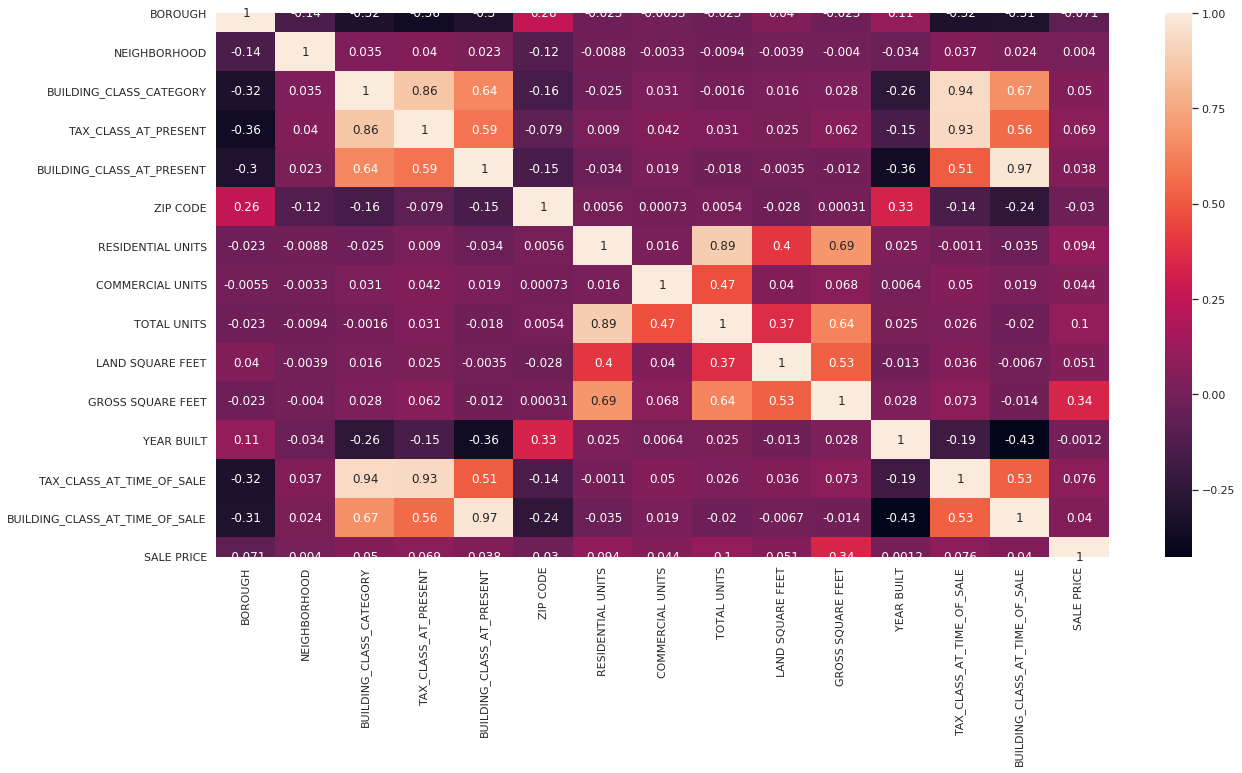

In [0]:
sns.heatmap(data.corr(), annot=True)

In [0]:
new_data = data[(data['SALE PRICE'] > 1000000) & (data['SALE PRICE'] < 4000000)]

features = ['BOROUGH', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_TIME_OF_SALE', 'YEAR BUILT']
#features = ['BOROUGH', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'YEAR BUILT']
x = new_data[features]
y = new_data['SALE PRICE']
new_data.describe()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE PRICE
count,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,1.260000e+04
mean,2.256984,128.668968,9.416746,4.286111,66.632063,10533.553651,1.507540,0.123254,1.644365,1598.461349,1612.151905,1755.234762,0.825714,67.519286,1.807839e+06
std,1.208808,78.534966,7.286559,2.537153,53.210304,1370.706208,3.380931,0.671532,3.492414,7903.026694,8690.720892,587.389370,0.709559,52.958032,7.269628e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001958e+06
25%,1.000000,63.000000,2.000000,1.000000,14.000000,10022.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1910.000000,0.000000,13.000000,1.250000e+06
50%,3.000000,122.000000,9.000000,5.000000,29.000000,11102.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1930.000000,1.000000,41.000000,1.550000e+06
75%,3.000000,221.000000,13.000000,5.000000,121.000000,11223.000000,2.000000,0.000000,2.000000,2200.000000,2486.500000,1986.000000,1.000000,120.000000,2.200000e+06
max,5.000000,253.000000,45.000000,10.000000,166.000000,11694.000000,193.000000,35.000000,193.000000,784218.000000,600613.000000,2016.000000,3.000000,165.000000,3.999999e+06


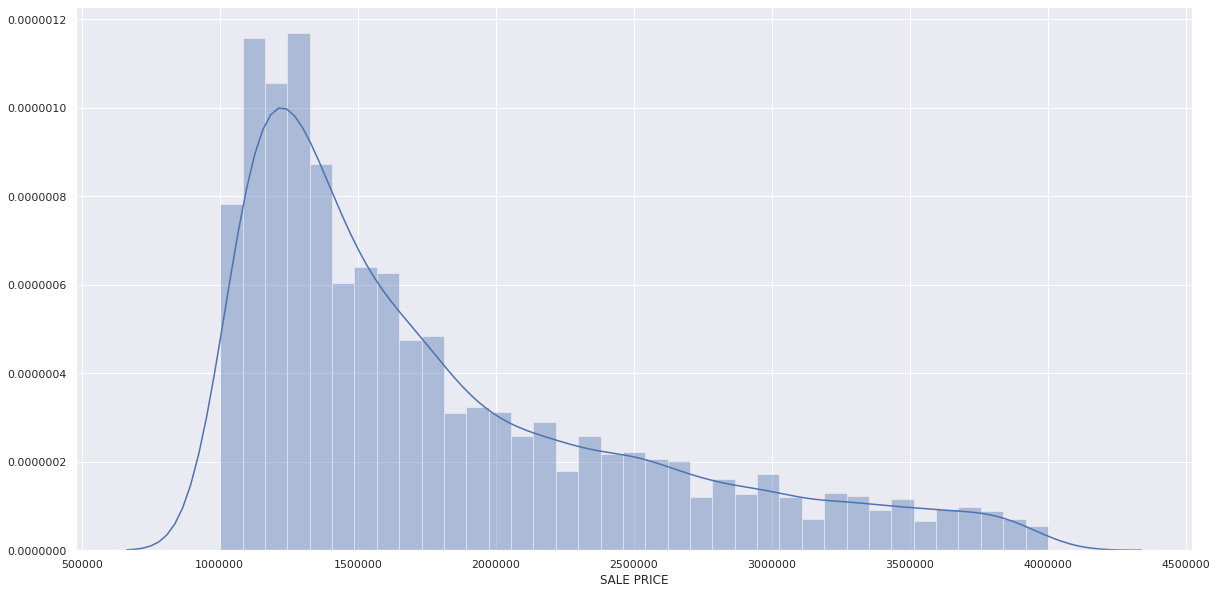

In [0]:
sns.distplot(new_data['SALE PRICE'])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
acc = lin_reg.score(x_test, y_test)
y_pred = lin_reg.predict(x_test)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 549763.5912349964
MSE: 506172008998.7249
RMSE: 711457.6649377845


In [0]:
# Ridge
clf=Ridge(alpha=1.0)
clf.fit(x,y)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
y_pred = clf.predict(x_train)
print('RMSE train:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
y_pred = clf.predict(x_test)
print('RMSE test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.09121974927059817
0.0796197707319235
RMSE train: 693704.0050962162
RMSE test: 696286.9290854819


In [0]:
# Lasso
clf=Lasso(alpha=1.0)
clf.fit(x,y)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
y_pred = clf.predict(x_train)
print('RMSE train:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
y_pred = clf.predict(x_test)
print('RMSE test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.09122072301523498
0.07961831470893732
RMSE train: 693703.633449311
RMSE test: 696287.4798412134
